homework 5
---
due: April 24 2022

authors: pegler, prüwasser, scheftner

# Part 1: function to linear regression with 2 predictors

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# defining the function

def my_mult_regr(x_1, x_2, y):
    """Computes linear regression with 2 predictors.
    
    Parameters
    ----------
    x_1, x_2 : array-like
        Predictor variables.
    y : array-like
        Outcome variable.

    Returns
    -------
    array-like
        Regression coefficients.
    float
        Total error.
    """
    if len(x_1) == len(x_2) == len(y):
        X = np.column_stack((np.ones(len(x_1)),x_1, x_2))
        coeff, total_error, _, _ = linalg.lstsq(X, y)
        return coeff, total_error
    else:
        raise Exception("All arrays must have the same length!")

# creating some sample data

np.random.seed(0)

n = 250 
sd_prices = 10_000
b_0 = 30_000 # intercept; ficticious average price at age == 0 and m² == 0
b_1 = -1_000 # slope for age
b_2 = 2_000 # slope for m²
sq_mtrs = np.random.randint(20, 200, n)
ages = np.random.randint(0, 200, n)
errors = np.random.normal(0, sd_prices, n)
prices = b_0 + b_1 * ages + b_2 * sq_mtrs + errors

# run function and show results

coeff, total_error = my_mult_regr(ages, sq_mtrs, prices)
print("Result:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

Result:

b_0: 29448.579124575088 
b_1: -1003.1356189123504 
b_2: 2001.1879283010696 

Total error: 2.522912e+10


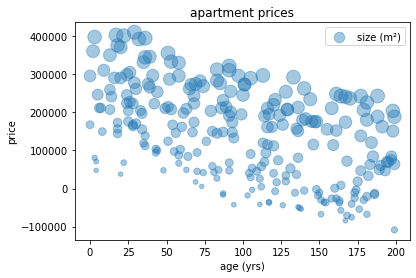

In [160]:
plt.scatter(ages, prices, s=sq_mtrs, alpha = 0.4)
plt.xlabel('age (yrs)')
plt.ylabel('price')
plt.legend(["size (m²)"])
plt.title("apartment prices");

# Part 2: standardize predictors and compare regression results

We will show a change of coefficients and the intercepts (refer now to the mean values instead of the zero values), but the errors will stay the same.

In [172]:
# defining the function

def get_z_scores(x):
    """Computes z-scores.
    
    Parameters
    ----------
    x : array-like
        An array like object containing the sample data.

    Returns
    -------
    zscores : array_like
        The z-scores, standardized by mean and standard deviation of
        input array `x`.
    """
    
    return (x - np.mean(x))/np.std(x)

# standardize predictors

ages_z = get_z_scores(ages)
sq_mtrs_z = get_z_scores(sq_mtrs)

# compare regression results with both predictors

coeff, total_error = my_mult_regr(ages, sq_mtrs, prices)
print("Previous result without standardizing:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error = my_mult_regr(ages_z, sq_mtrs_z, prices)
print("\n\nResult with standardized predictors:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

Previous result without standardizing:

b_0: 29448.579124575088 
b_1: -1003.1356189123504 
b_2: 2001.1879283010696 

Total error: 2.522912e+10


Result with standardized predictors:

b_0: 143011.93804006433 
b_1: -57751.27655757994 
b_2: 104016.3865156174 

Total error: 2.522912e+10


## age as the only predictor

In [171]:
# compare regression results for predictor age

coeff, total_error, _, _ = linalg.lstsq(ages[:, np.newaxis]**[0, 1], prices)
print("Result without standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error, _, _ = linalg.lstsq(ages_z[:, np.newaxis]**[0, 1], prices)
print("\n\nResult with standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

Result without standardization:

b_0: 247160.47168935082 
b_1: -1049.5881570654092 

Total error: 2.728293e+12


Result with standardization:

b_0: 143011.93804006436 
b_1: -60425.58432524543 

Total error: 2.728293e+12


## square meters as the only predictor

In [167]:
# compare regression results for predictor sq_mtrs

coeff, total_error, _, _ = linalg.lstsq(sq_mtrs[:, np.newaxis]**[0, 1], prices)
print("Result without standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error, _, _ = linalg.lstsq(sq_mtrs_z[:, np.newaxis]**[0, 1], prices)
print("\n\nResult with standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

Result without standardization:

b_0: -73132.55355431057 
b_1: 2029.754447396654 

Total error: 8.584804e+11


Result with standardization:

b_0: 143011.93804006436 
b_1: 105501.19763686648 

Total error: 8.584804e+11


# Part 3: car price simulation  

price as a function of age

In [134]:
# given values
mean_price_new = 30_000
sd_price = 10_000
n = 200
age_lower = 0
age_upper = 70

## Finding a function and coefficients for a realistic curve

To fiddle with the values of the function, we could also create numpy arrays, but we chose to use the sympy package as it seems perfect for the task.

https://www.sympy.org

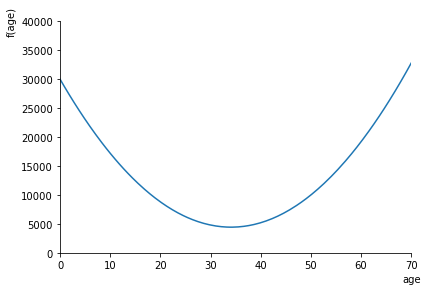

In [135]:
import sympy as spy

age, price_func = spy.symbols("age value")

b_0 = mean_price_new # avg value at age = 0
b_1 = -1500 # value loss per year
b_2 = 22 # value gain per year*year

price_func = b_0 + b_1 * age + b_2 * age**2

spy.plot(price_func,(age, 0, 70),xlim=(0,70),ylim=(0,40_000),axis_center=(0,0));

### Check if minimum is realistic: It is where derivative is 0

Derivative of price for age

In [136]:
d_age = spy.diff(price_func,age)
d_age

44*age - 1500

Age at minimum value

In [137]:
age_min = float(spy.solve(d_age)[0])
age_min

34.09090909090909

Minimum value

In [138]:
price_min = float(price_func.evalf(subs={age:age_min}))
price_min

4431.818181818182

## Create simulated data from function

Let's remember the price function from before

In [139]:
price_func

22*age**2 - 1500*age + 30000

That means function for one datapoint is:

$price = price_{mean} - 1500age + 22age² + error$

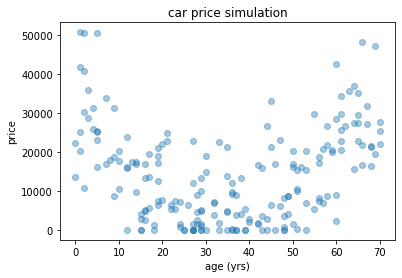

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# creating ages array (uniformly distributed)
ages = np.random.randint(age_lower,age_upper+1,n)

# error array
err = np.random.normal(0, scale = sd_price, size=n)

# prices array
prices = np.array([b_0 + b_1 * ages[i] + b_2 * ages[i]**2 + err[i] for i in range(n)])

# limit lowest price to 0
prices = np.where(prices<0, 0, prices)

plt.scatter(ages,prices, alpha=0.4)
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.title("car price simulation");

## Fit 3 regression models to the simulated data
  

print the obtained residual error for the three models and visualize the model predictions

### 1. intercept + linear predictor $age$

using `linalg.lstsq`

In [141]:
from scipy import linalg

# adding required column of ones to the predictor variable (because of matrix- vector multiplication)
ages_ = np.stack([ages,np.ones(n)], axis=1)

coeff,total_error,_,_ = linalg.lstsq(ages_,prices)
price_pred_1 = np.array([coeff[1] + coeff[0] * ages[i] for i in range(n)])

print("total error (scipy.linalg):",format(total_error,"e"))
print("intercept b_0 =",coeff[1])
print("slope b_1 =",coeff[0])

total error (scipy.linalg): 2.903150e+10
intercept b_0 = 12915.991407941381
slope b_1 = 34.757495051933745


In [142]:
res = (price_pred_1 - prices)**2
total_error_1 = np.sum(res)
print("total error (manually calculated):",format(total_error_1,"e"))

total error (manually calculated): 2.903150e+10


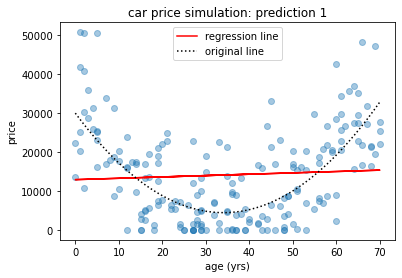

In [143]:
polyline = np.linspace(age_lower, age_upper)
prices_orig = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline]

plt.scatter(ages,prices, alpha=0.4)
plt.plot(ages,price_pred_1, c="red",label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.legend()
plt.title("car price simulation: prediction 1");

### 2. intercept + linear predictor $age$ + quadratic predictor $age²$

using `np.polyfit`

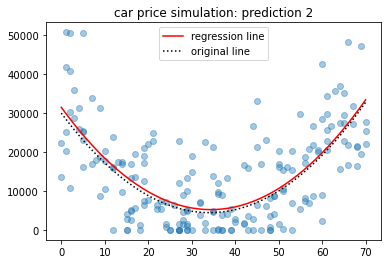

In [144]:
model_2 = np.poly1d(np.polyfit(ages, prices, 2))

price_reg_2 = model_2(polyline)

plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, price_reg_2, c="red",label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.legend()
plt.title("car price simulation: prediction 2");
plt.show()

In [145]:
print("intercept b_0 =",model_2[0])
print("slope b_1 =",model_2[1])
print("slope b_2 =",model_2[2])

intercept b_0 = 31492.57508926511
slope b_1 = -1528.9003782388236
slope b_2 = 22.237739180274467


In [146]:
price_pred_2 = model_2(ages)
res_2 = (price_pred_2 - prices)**2
total_error_2 = np.sum(res_2)
print("total error (manually calculated):",format(total_error_2,"e"))

total error (manually calculated): 1.510247e+10


### 3. intercept + linear predictor $age$ + quadratic predictor $age^2$ + cubic predicor $age³$

using `np.polyfit`

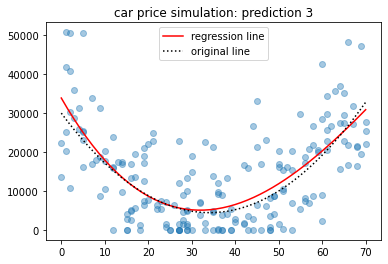

In [147]:
model_3 = np.poly1d(np.polyfit(ages, prices, 3))

price_reg_3 = model_3(polyline)

plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, price_reg_3, c="red", label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.legend()
plt.title("car price simulation: prediction 3");
plt.show()

In [148]:
print("intercept b_0 =",model_3[0])
print("slope b_1 =",model_3[1])
print("slope b_2 =",model_3[2])
print("slope b_3 =",model_3[3])

intercept b_0 = 33880.98970584922
slope b_1 = -1956.602805285778
slope b_2 = 37.78611413039342
slope b_3 = -0.14922187399622291


In [149]:
price_pred_3 = model_3(ages)
res_3 = (price_pred_3 - prices)**2
total_error_3 = np.sum(res_3)
print("total error (manually calculated):",format(total_error_3,"e"))

total error (manually calculated): 1.489680e+10


# Bonus: reliability of regression analysis

Jozsef Arató:

*"since we created the data, we can see how close are the true values to the 'generative' model next task is to systematically investigate this relationship you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters.*

*this task is somewhat analogous to the t-test simulation task"*


In [173]:
# permutation with number of datapoints (so far it was 200)
# and error (standard deviation was 10_000)
# if it's analogous to the t-test simulation task
# I'd expect we should plot again this kind of heatmap
# with x for n and y for standard deviation

# remember -> each pixel represented the proportion of significant cases out of 1_000 simulations
# so far we only saw 1 simulation ... meaning we should repeat it 1_000 and also vary error and n
#
# what could mean "significant" here?
# mean difference between price in original line and price of regression line?
# or the total error?

# so, we were not quite sure what exactly it was we had to do here.

# one way of solving that could be to calculate the total error between the original line and the regression line

function for simulation with regression line of the quadratic function (we omit the other models)

In [151]:
def sim_error(n_points, sd, n_sims=10):
    
    age_lower = 0 # fixed values
    age_upper = 70

    total_errors = list()

    for i in range(n_sims):

        ages_sim = np.random.randint(age_lower,age_upper+1,n_points)
        err_sim = np.random.normal(0, scale = sd, size=n_points)
        prices_sim = np.array([b_0 + b_1 * ages_sim[i] + b_2 * ages_sim[i]**2 + err_sim[i] for i in range(n_points)])
        prices_sim = np.where(prices_sim<0, 0, prices_sim)

        polyline_sim = np.linspace(age_lower, age_upper)
        prices_orig_sim = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline_sim]

        model_sim = np.poly1d(np.polyfit(ages_sim, prices_sim, 2))
        price_reg_sim = model_sim(polyline_sim)

        res_sim = (price_reg_sim - prices_orig_sim)**2
        total_error_sim = np.sum(res_sim)
        total_errors.append(total_error_sim)

    total_error_mean = np.mean(total_errors)
    
    return total_error_mean

n_space = range(50,600, 50)
sd_space = range(100,30_000,4_000)

n_cases_sim = n_space[0]
sd_sim = sd_space[0]

results_arr=np.zeros((len(sd_space),len(n_space)))  

print("Number of permutations:",np.size(results_arr))

Number of permutations: 88


CPU times: user 1min 45s, sys: 1.49 s, total: 1min 46s
Wall time: 27.6 s


Text(0.5, 1.0, 'total errors original vs regression line')

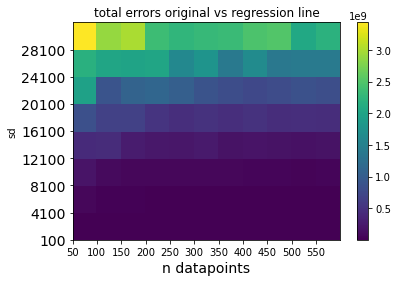

In [152]:
%%time

n_sim = 20 # would be better with a higher number, but it takes very long

for i_sd,sd in enumerate(sd_space):
    for i_n,n in enumerate(n_space):
        results_arr[i_sd,i_n]=sim_error(n,sd,n_sim)

plt.pcolor(results_arr)
plt.xticks(np.arange(len(n_space)),n_space)
plt.xlabel('n datapoints',fontsize=14)
plt.yticks(np.arange(len(sd_space)),sd_space,fontsize=14)
plt.ylabel('sd')

plt.colorbar()
plt.title('total errors original vs regression line');

**what you can see: high standard deviation and low number of data points -> less precise**

**2 Examples:**



In [153]:
def sim_curves(n_points, sd):
    
    """
    returns arrays for plotting and the total error
    
    """

    age_lower = 0 # fixed values
    age_upper = 70


    ages_sim = np.random.randint(age_lower,age_upper+1,n_points)
    err_sim = np.random.normal(0, scale = sd, size=n_points)
    prices_sim = np.array([b_0 + b_1 * ages_sim[i] + b_2 * ages_sim[i]**2 + err_sim[i] for i in range(n_points)])
    prices_sim = np.where(prices_sim<0, 0, prices_sim)

    polyline_sim = np.linspace(age_lower, age_upper)
    prices_orig_sim = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline_sim]

    model_sim = np.poly1d(np.polyfit(ages_sim, prices_sim, 2))
    price_reg_sim = model_sim(polyline_sim)

    res_sim = (price_reg_sim - prices_orig_sim)**2
    total_error_sim = np.sum(res_sim)
    
    plt.scatter(ages_sim, prices_sim, alpha=0.4)
    plt.plot(polyline_sim, price_reg_sim, c="red",label = "regression line")
    plt.plot(polyline_sim, prices_orig_sim, c="black", label="original line", linestyle=":")
    plt.legend()
    plt.title("car price simulation: regression 2");
    plt.show()
    
    print("total error:",format(total_error_sim,"e"))

#### High error: few points, high standard deviation

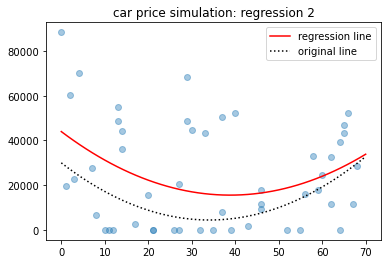

total error: 5.845330e+09


In [154]:
n_points = 50
sd = 25_000

sim_curves(n_points, sd)

#### Low error: many points, low standard deviation

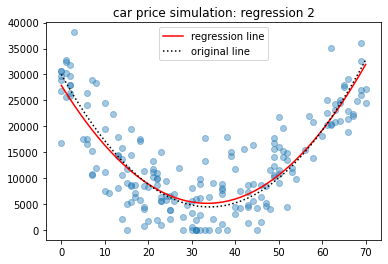

total error: 3.015523e+07


In [155]:
n_points = 200
sd = 5_000

sim_curves(n_points, sd)

In [444]:
# error measure could be improved ... is now absolute squared error (not really comparable),
# could be turned into MSE or RMSE for better comparability